#잡케어 추천시스템 경진대회

# 데이터 전처리

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
sub_1=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/sample_submission.csv")
test=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/test.csv", parse_dates=["contents_open_dt"])
train=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/train.csv", parse_dates=["contents_open_dt"])
d_code=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/속성_D_코드.csv", index_col=0).T.to_dict()
h_code=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/속성_H_코드.csv", index_col=0).T.to_dict()
l_code=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/속성_L_코드.csv" ,index_col=0).T.to_dict()

In [4]:
#n : 세분류, s: 소분류, m: 중분류, l: 대분류
def add_code(df, d_code, h_code, l_code):
    df['person_prefer_d_1_n']= df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s']= df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l']= df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])
    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])
    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])
    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])
    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드']) 
    return df

train = add_code(train, d_code, h_code, l_code)
test= add_code(test, d_code, h_code, l_code)

- n: 세분류

- s: 소분류

- m: 중분류

- l: 대분류

- 참고한 링크: https://dacon.io/competitions/official/235863/codeshare/3877?page=1&dtype=recent

In [5]:
for i in range(1,7):
    name=train.columns[i]
    train[name]=train[name].apply(lambda x:1 if x==True else 2)
    
for i in range(1,7):
    name=test.columns[i]
    test[name]=test[name].apply(lambda x:1 if x==True else 2)

In [6]:
train["date"]=train["contents_open_dt"].dt.strftime("%d")
train["hour"]=train["contents_open_dt"].dt.strftime("%H")
train["day"]=train["contents_open_dt"].dt.strftime("%A")

train["date"]=train["date"].astype(int)
train["hour"]=train["hour"].astype(int)

In [7]:
test["date"]=test["contents_open_dt"].dt.strftime("%d")
test["hour"]=test["contents_open_dt"].dt.strftime("%H")
test["day"]=test["contents_open_dt"].dt.strftime("%A")

test["date"]=test["date"].astype(int)
test["hour"]=test["hour"].astype(int)

In [8]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

train["day"]=le.fit_transform(train['day'])
test["day"]=le.fit_transform(test['day'])

In [9]:
train.drop("contents_open_dt", axis=1, inplace=True)
test.drop("contents_open_dt", axis=1, inplace=True)
train.drop(['person_prefer_f','person_prefer_g'], axis=1, inplace=True)
test.drop(['person_prefer_f','person_prefer_g'], axis=1, inplace=True)

In [10]:
train.drop(['id'], axis=1, inplace=True)
test.drop(['id'], axis=1, inplace=True)

# 실험데이터 생성 및 테스트 검증

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [12]:
# 현재까지 잘 나왔던 모델 후보
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from tqdm import tqdm
qd=QuadraticDiscriminantAnalysis()
ld=LinearDiscriminantAnalysis()
extra=ExtraTreesClassifier(random_state=42)

In [13]:
def make_sample(df, n):
  df_0=df.loc[df['target']==0]
  df_1=df.loc[df['target']==1]
  df_0_drop, df_00=train_test_split(df_0, test_size=n, random_state=42)
  df_00=df_00.reset_index()
  df_1=df_1.reset_index()
  new_df=pd.concat([df_1, df_00], axis=0)
  new_df=new_df.sort_values('index', ascending=True)
  new_df.drop('index', axis=1, inplace=True)
  zero=len(new_df.loc[new_df['target']==0].index)
  one=len(new_df.loc[new_df['target']==1].index)
  ratio=[zero, one]
  labels=['target_0', 'target_1']
  plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)
  plt.show()
  return new_df

In [14]:
def only_pie_chart(df):
  zero=len(df.loc[df['target']==0].index)
  one=len(df.loc[df['target']==1].index)
  ratio=[zero, one]
  labels=['target_0', 'target_1']
  plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)
  plt.show()

In [15]:
def result(model, x_train,y_train, x_test, y_test, x,y,x_val,y_val):
  model.fit(x_train, y_train)
  y_pred_1=model.predict(x_test)
  df_y_pred_1=pd.DataFrame(y_pred_1, columns=['target'])
  df_y_pred_1['target']=df_y_pred_1['target'].apply(lambda x:1 if x>=0.5 else 0)
  f_1_1=f1_score(y_test,df_y_pred_1['target'])
  recall_1=recall_score(y_test, df_y_pred_1['target'])
  precision_1=precision_score(y_test, df_y_pred_1['target'])
  print("recall 1차 :", recall_1)
  print("precision 1차: ", precision_1)
  print("f1_1차 : ", f_1_1)
  auc_roc=classification_report(y_test, df_y_pred_1['target'])
  print(auc_roc)
  conf=confusion_matrix(y_test, df_y_pred_1['target'])
  sns.heatmap(conf/np.sum(conf), annot=True, cmap='Pastel1', fmt='.2%')
  plt.show()

  model.fit(x, y)
  y_pred_2=model.predict(x_val)
  df_y_pred_2=pd.DataFrame(y_pred_2, columns=['target'])
  df_y_pred_2['target']=df_y_pred_2['target'].apply(lambda x:1 if x>=0.5 else 0)
  f_1_2=f1_score(y_val, df_y_pred_2)
  recall_2=recall_score(y_val, df_y_pred_2)
  precision_2=precision_score(y_val, df_y_pred_2)
  print("recall 2차 :", recall_2)
  print("precision 2차: ", precision_2)
  print("f1_2차 : ", f_1_2 )
  auc_roc=classification_report(y_val, df_y_pred_2)
  print(auc_roc)
  conf=confusion_matrix(y_val, df_y_pred_2)
  sns.heatmap(conf/np.sum(conf), annot=True, cmap='Pastel1', fmt='.2%')
  plt.show()

  f_1_a=(f_1_1+f_1_2)/2
  print("f1 avg score :", f_1_a)

**원본 Train 데이터**

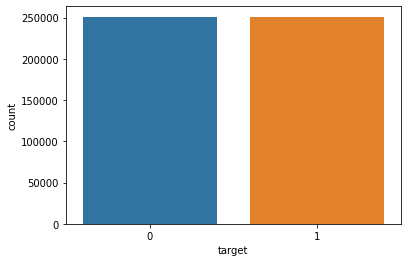

In [17]:
sns.countplot(train['target'])
sns.set_style('darkgrid')

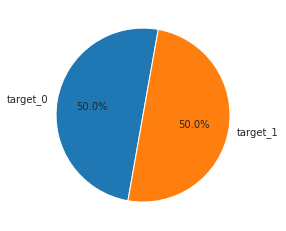

In [18]:
only_pie_chart(train)

#기존에 하던 방식


Train: 50 대 50
Test: 80대 20


검증 데이터 1의 타겟 비율


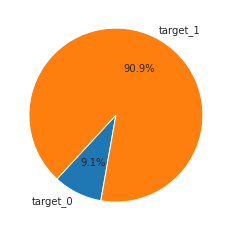

검증 데이터 2의 타겟 비율


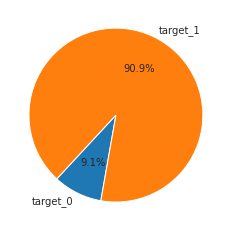

In [40]:
tn_8_A, tn_8_val=train_test_split(train, test_size=0.2, random_state=42)
tn_8_tn, tn_8_te=train_test_split(tn_8_A, test_size=0.2, random_state=999)
print("검증 데이터 1의 타겟 비율")
tn_8_val=make_sample(tn_8_val, 0.1)
print("검증 데이터 2의 타겟 비율")
tn_8_te=make_sample(tn_8_te, 0.1)

recall 1차 : 0.6164304959584872
precision 1차:  0.9410801340645948
f1_1차 :  0.7449201085318059
              precision    recall  f1-score   support

           0       0.14      0.62      0.23      4023
           1       0.94      0.62      0.74     40084

    accuracy                           0.62     44107
   macro avg       0.54      0.62      0.49     44107
weighted avg       0.87      0.62      0.70     44107



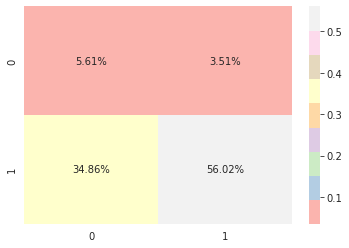

recall 2차 : 0.6155438764134417
precision 2차:  0.9419936631732878
f1_2차 :  0.7445578886534387
              precision    recall  f1-score   support

           0       0.14      0.62      0.23      5016
           1       0.94      0.62      0.74     50232

    accuracy                           0.62     55248
   macro avg       0.54      0.62      0.49     55248
weighted avg       0.87      0.62      0.70     55248



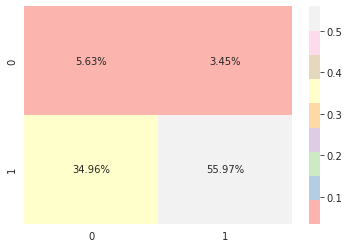

f1 avg score : 0.7447389985926223


In [42]:
extra=ExtraTreesClassifier(random_state=42)
x_train=tn_8_tn.drop('target', axis=1)
y_train=tn_8_tn['target']
x_test=tn_8_te.drop('target', axis=1)
y_test=tn_8_te['target']

x=tn_8_A.drop('target', axis=1)
y=tn_8_A['target']
x_val=tn_8_val.drop('target', axis=1)
y_val=tn_8_val['target']
result(extra, x_train,y_train, x_test, y_test, x,y,x_val,y_val)

#Default(절대 건들지 말 것, 성과측정 기준자료)

**실제 제출 당시 1등 파일 복원이 안 돼서, 2등 파일 자료로 대체**

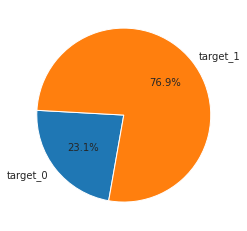

In [19]:
tn_8=make_sample(train, 0.3)

In [20]:
tn_8_A, tn_8_val=train_test_split(tn_8, test_size=0.3, random_state=42)

In [21]:
tn_8_tn, tn_8_te=train_test_split(tn_8_A, test_size=0.3, random_state=999)

In [26]:
x_train=tn_8_tn.drop('target', axis=1)
y_train=tn_8_tn['target']
x_test=tn_8_te.drop('target', axis=1)
y_test=tn_8_te['target']

x=tn_8_A.drop('target', axis=1)
y=tn_8_A['target']
x_val=tn_8_val.drop('target', axis=1)
y_val=tn_8_val['target']

recall 1차 : 0.978083287316488
precision 1차:  0.7801166393293238
f1_1차 :  0.8679548161979029
              precision    recall  f1-score   support

           0       0.57      0.09      0.16     15980
           1       0.78      0.98      0.87     52517

    accuracy                           0.77     68497
   macro avg       0.67      0.54      0.51     68497
weighted avg       0.73      0.77      0.70     68497



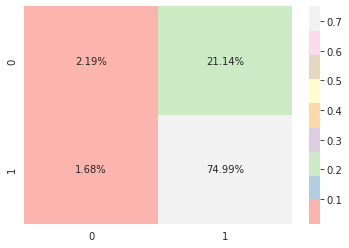

recall 2차 : 0.9748388383066392
precision 2차:  0.7814977410280454
f1_2차 :  0.8675265993624434
              precision    recall  f1-score   support

           0       0.53      0.09      0.16     22619
           1       0.78      0.97      0.87     75235

    accuracy                           0.77     97854
   macro avg       0.65      0.53      0.51     97854
weighted avg       0.72      0.77      0.70     97854



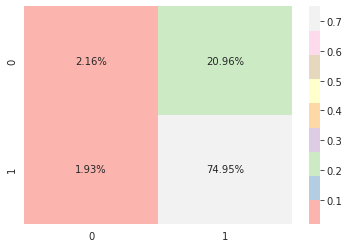

f1 avg score : 0.8677407077801731


In [27]:
result(extra, x_train,y_train, x_test, y_test, x,y,x_val,y_val)

-----------------------
절대 건드리지 말 것

In [ ]:
x_train=tn_8_A.drop('target', axis=1)
y_train=tn_8_A['target']
x_test=test.copy()

In [ ]:
extra=ExtraTreesClassifier(random_state=42)
extra.fit(x_train, y_train)
y_pred=extra.predict(x_test)
df_pred=pd.DataFrame(y_pred, columns=['target'])
df_pred['target']=df_pred['target'].apply(lambda x:1 if x>=0.5 else 0)

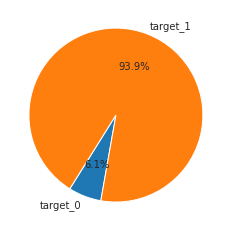

In [ ]:
only_pie_chart(df_pred)

In [ ]:
df_pred['target'].value_counts()

1    43565
0     2839
Name: target, dtype: int64

- score: 0.6777000359

In [ ]:
sub_1.drop('target',axis=1, inplace=True)
sub_extra=pd.concat([sub_1, df_pred], axis=1)

In [ ]:
sub_extra.to_csv("sub_extra_1.csv", index=False)

-------------------------------

# Experiment 01

최종학습데이터를 다시 학습데이터와 최종검증데이터로 변환하고, 학습데이터를 다시 실험학습데이터와 실험검증데이터로 변환합니다.

1차적으로 실험학습데이터로 실험검증데이터를 맞춰보고, 

2차적으로 학습데이터를 최종검증데이터로 맞춰본뒤, 이들의 산술평균 precision, recall, f1-score로 평가하여 비교하여 봅니다.

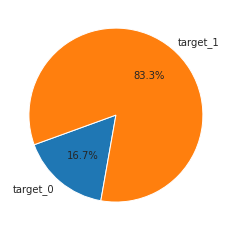

In [28]:
tn_8=make_sample(train, 0.2)
tn_8_A, tn_8_val=train_test_split(tn_8, test_size=0.2, random_state=42)
tn_8_tn, tn_8_te=train_test_split(tn_8_A, test_size=0.2, random_state=999)

In [29]:
x_train=tn_8_tn.drop('target', axis=1)
y_train=tn_8_tn['target']
x_test=tn_8_te.drop('target', axis=1)
y_test=tn_8_te['target']

x=tn_8_A.drop('target', axis=1)
y=tn_8_A['target']
x_val=tn_8_val.drop('target', axis=1)
y_val=tn_8_val['target']

recall 1차 : 0.9924517961237607
precision 1차:  0.8375344251266634
f1_1차 :  0.9084358503688332
              precision    recall  f1-score   support

           0       0.50      0.04      0.07      8029
           1       0.84      0.99      0.91     40142

    accuracy                           0.83     48171
   macro avg       0.67      0.51      0.49     48171
weighted avg       0.78      0.83      0.77     48171



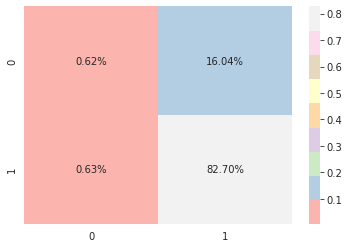

recall 2차 : 0.9910313901345291
precision 2차:  0.8376711982614848
f1_2차 :  0.9079206836108676
              precision    recall  f1-score   support

           0       0.47      0.04      0.07     10039
           1       0.84      0.99      0.91     50175

    accuracy                           0.83     60214
   macro avg       0.66      0.52      0.49     60214
weighted avg       0.78      0.83      0.77     60214



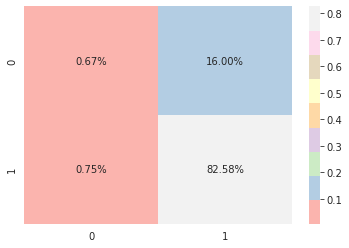

f1 avg score : 0.9081782669898504


In [30]:
result(extra, x_train,y_train, x_test, y_test, x,y,x_val,y_val)

In [31]:
x_train=tn_8.drop('target', axis=1)
y_train=tn_8['target']
x_test=test.copy()

In [32]:
extra=ExtraTreesClassifier(random_state=42)
extra.fit(x_train, y_train)
y_pred=extra.predict(x_test)
df_pred=pd.DataFrame(y_pred, columns=['target'])
df_pred['target']=df_pred['target'].apply(lambda x:1 if x>=0.5 else 0)

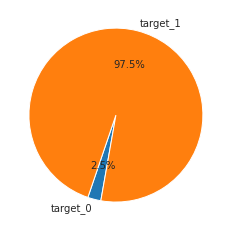

In [33]:
only_pie_chart(df_pred)

In [34]:
df_pred['target'].value_counts()

1    45267
0     1137
Name: target, dtype: int64

In [ ]:
sub=sub_1.drop('target',axis=1)
sub_extra=pd.concat([sub, df_pred['target']], axis=1)

In [ ]:
#sub_extra.to_csv("sub_extra_2.csv", index=False)

# Experiment 2

Default vs Experiment 01

**Default 70대 30 Test**

마지막에 tn_8이 아닌 tn_8_A를 학습시킨 것이 포인트

1차 검증

|f1|recall|precision|
|---|---|---|
|0.8679|0.97804|0.7801|


2차 검증

|f1|recall|precision|
|---|---|---|
|0.8675|0.9748|0.7814|


f1 avg score : 0.8677407077801731

> **실제 score: 0.6777000359**



**80대 20 Test**

전부, 80대 20 비율로 조정

1차 검증

|f1|recall|precision|
|---|---|---|
|0.9084|0.9924|0.8375|

2차 검증

|f1|recall|precision|
|---|---|---|
|0.9079|0.9910|0.8376|

f1 avg score : 0.9081782669898504

실제 score: 0.6745427496	

> Train에서 target이 0인 데이터와 target이 1인데이터의 비율을 다르게 해서, Trade off 관계인 recall과 precision을 둘 다 높여서,f1 score를 높였었다. 그러나, 오히려 score는 더 떨어진다.

기존의 train에서 target이 균형하나, test의 target 불균형한 문제의 해결방식은 다음과 같았다.

> 파란색은 target이 0인 데이터

> 노란색은 target이 1인 데이터

> 빨간색은 Decision Boundary(결정 경계)

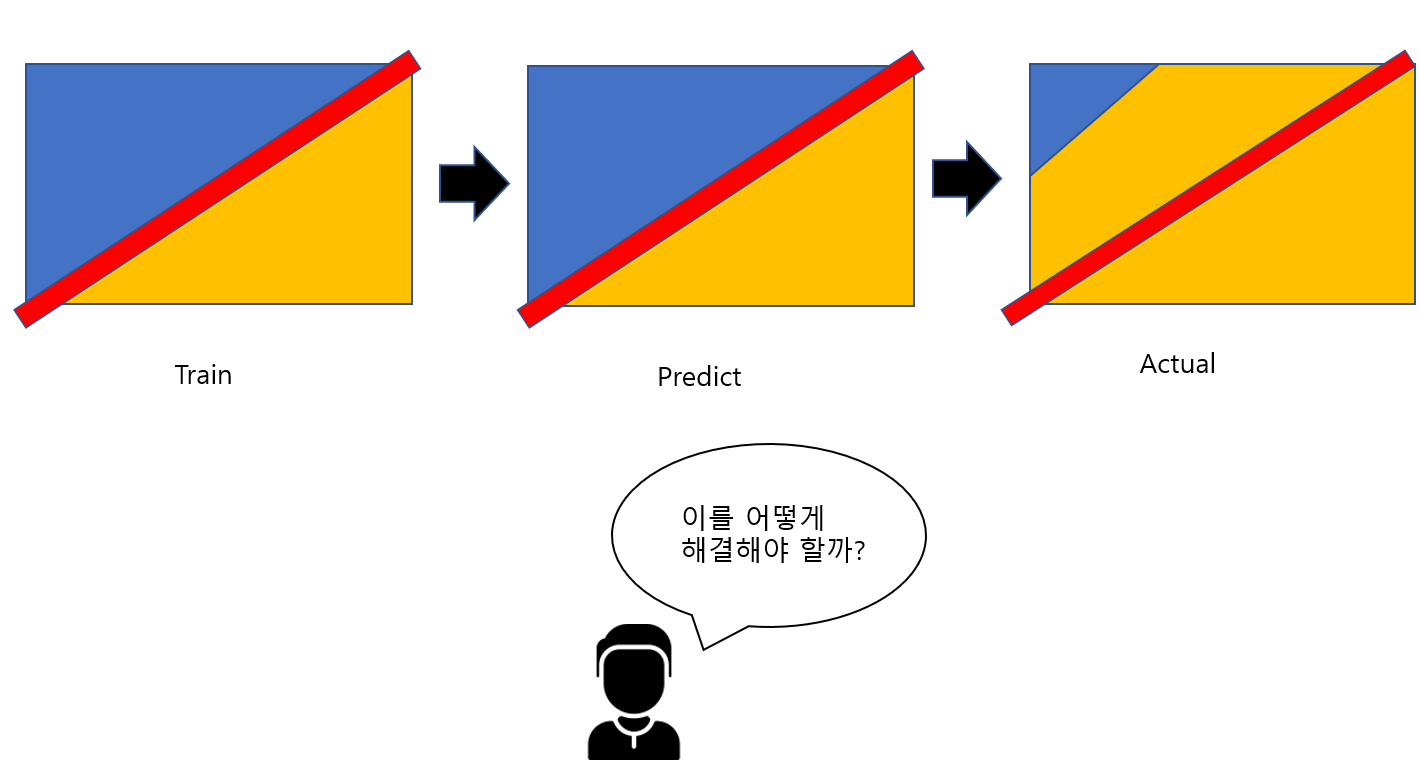

학습시킬 데이터를 의도적으로 불균형하게 만들어서 학습을 시켜보자.

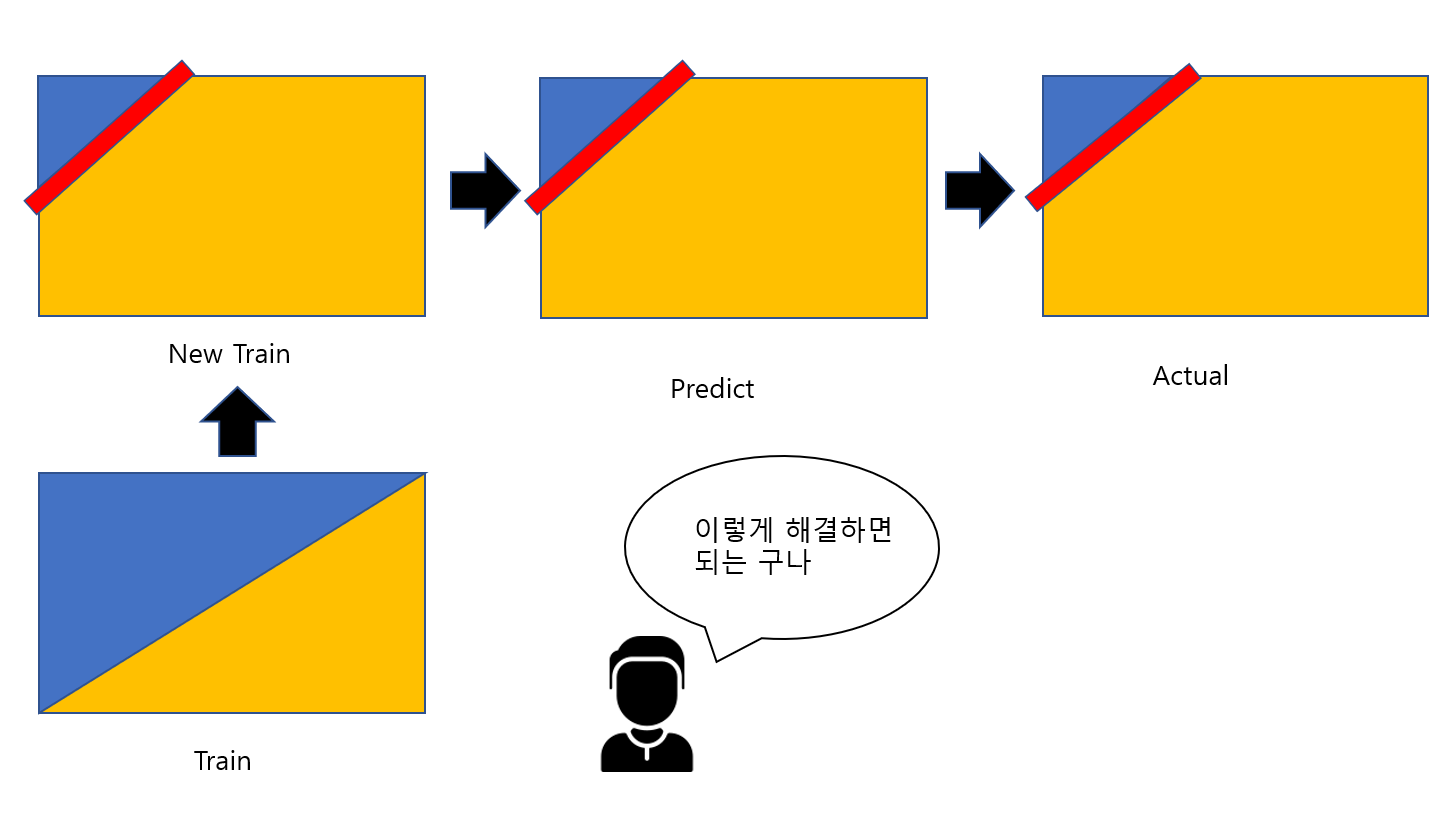

그러나, 실제 Actual 문제는 그림에서의 Actual과는 달랐다. 학습데이터를 바탕으로 하는 실험에서는 결과가 좋은 반면, 실제 테스트에서는 결과가 더 떨어졌기 때문이다.

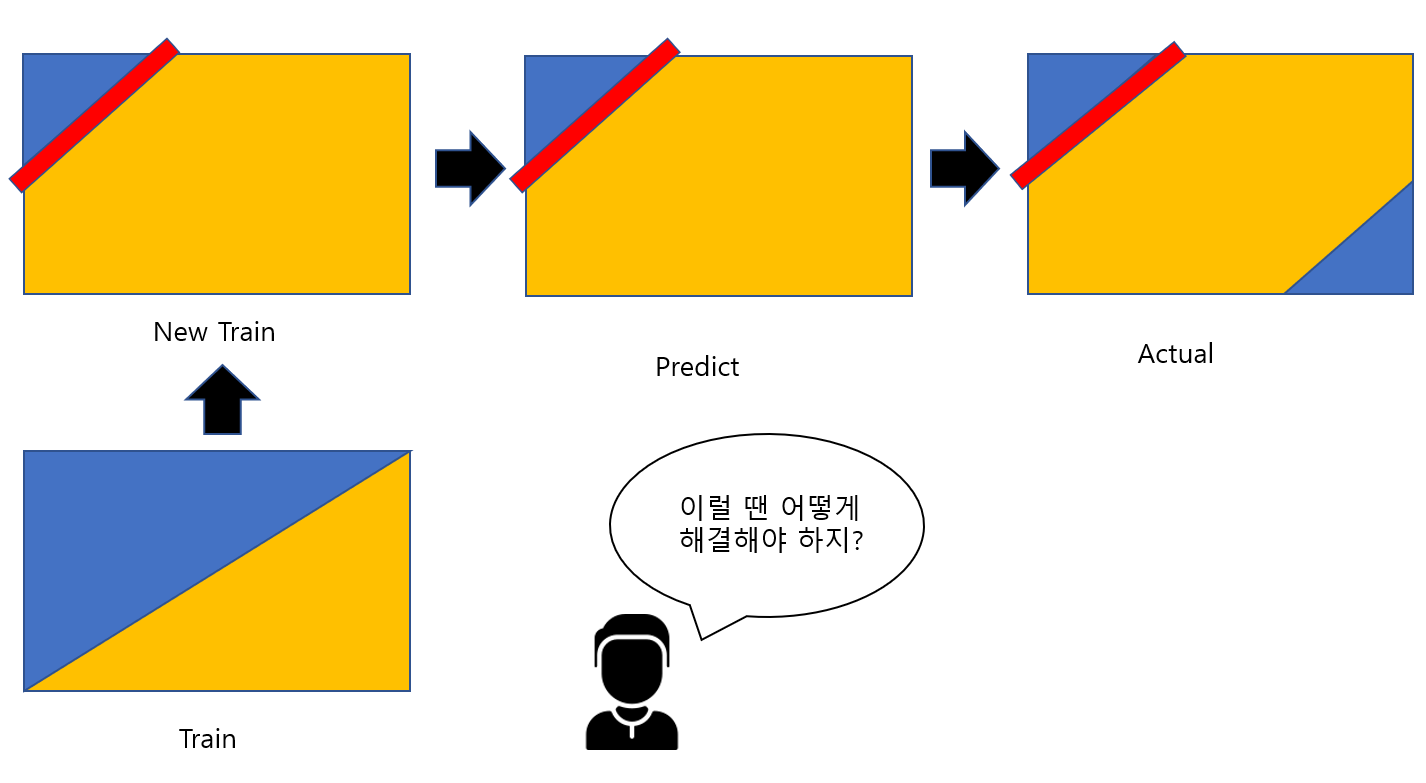

즉, 이런 상황인 것이다. 아까와 방식처럼 해결법을 생각하면 떠오르는 해결책은 있다.

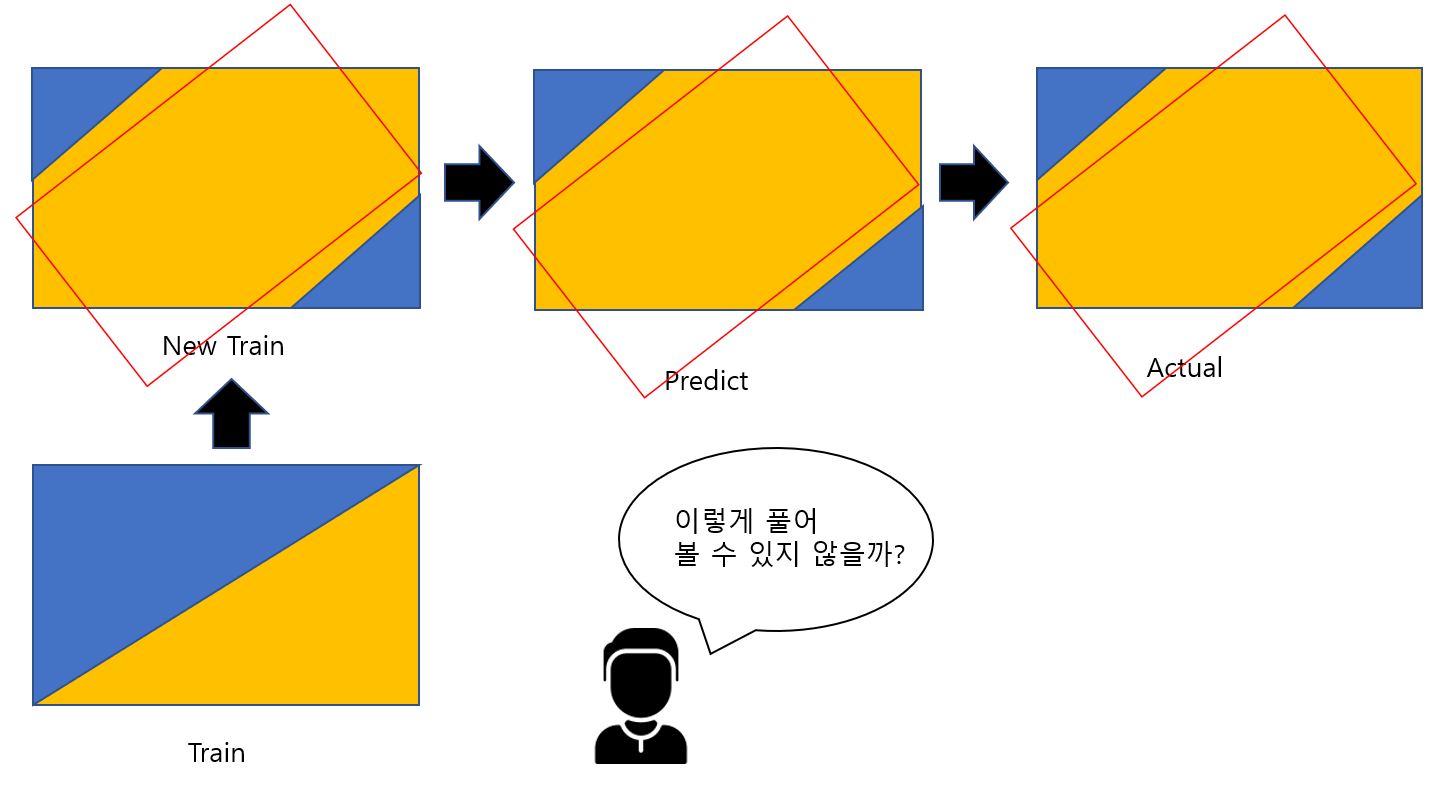

그런데 다음과 같은 문제가 발생한다.

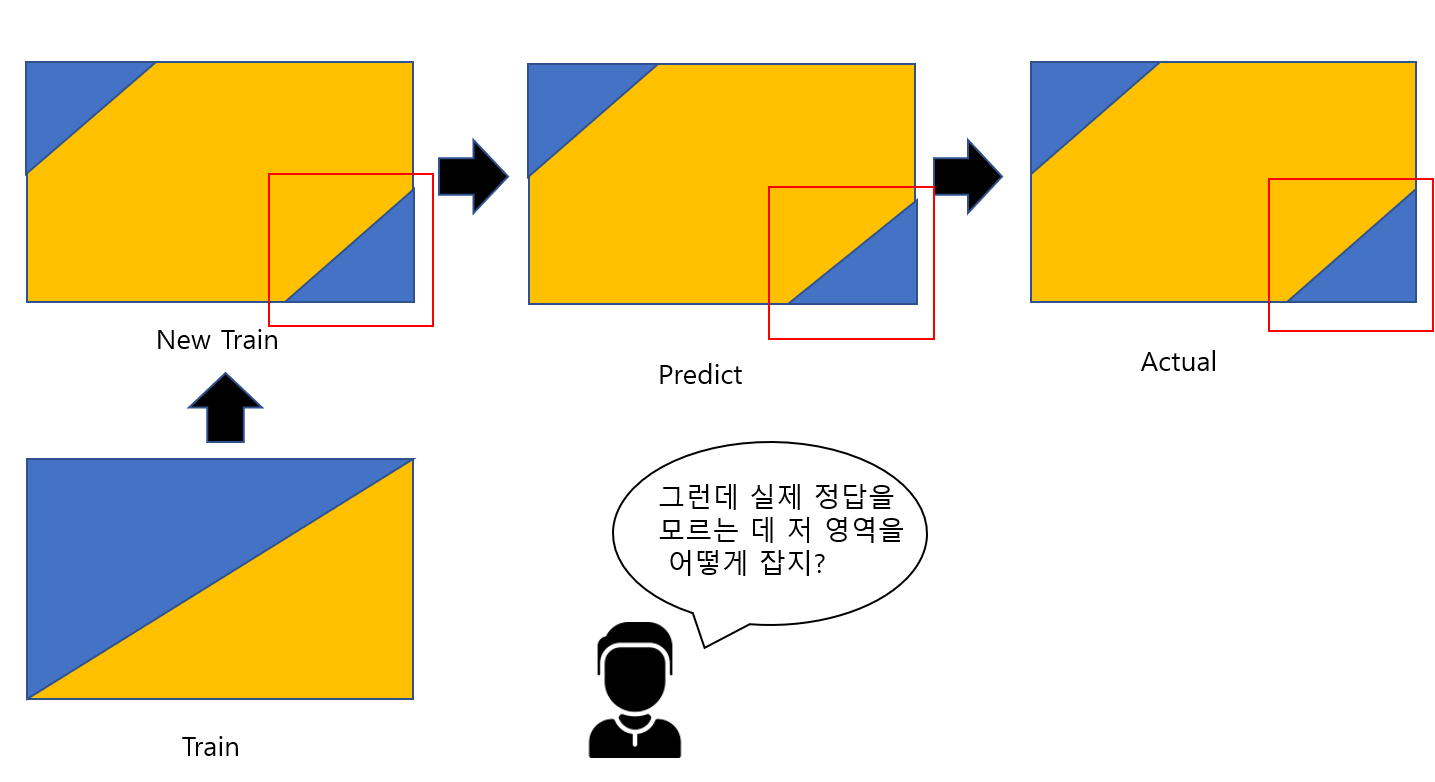

저 방식을 사용하려면, 실제 정답지가 훈련데이터와 다른 부분을 알아야, Train 데이터를 저런 식으로 새로운 0의 데이터를 만든 뒤, 추가하여 비선형 방법으로 학습시킬 수 있는데, 그 부분을 알수가 없다는 것이다.

이에 따라, Train 데이터에서 1의 특성을 가진 데이터에 라벨을 0으로 붙여주고, 0의 특성을 가진 데이터에 라벨을 1을 붙여서, Train 데이터를 더 혼란스럽게 만들어서, 실제 맞춰야 하는 문제보다 더 어려운 문제를 만들어서 이를 해결하는 방법을 찾아낸다면 좋지 않을까에서 나온 것이 Experiment 3이다.

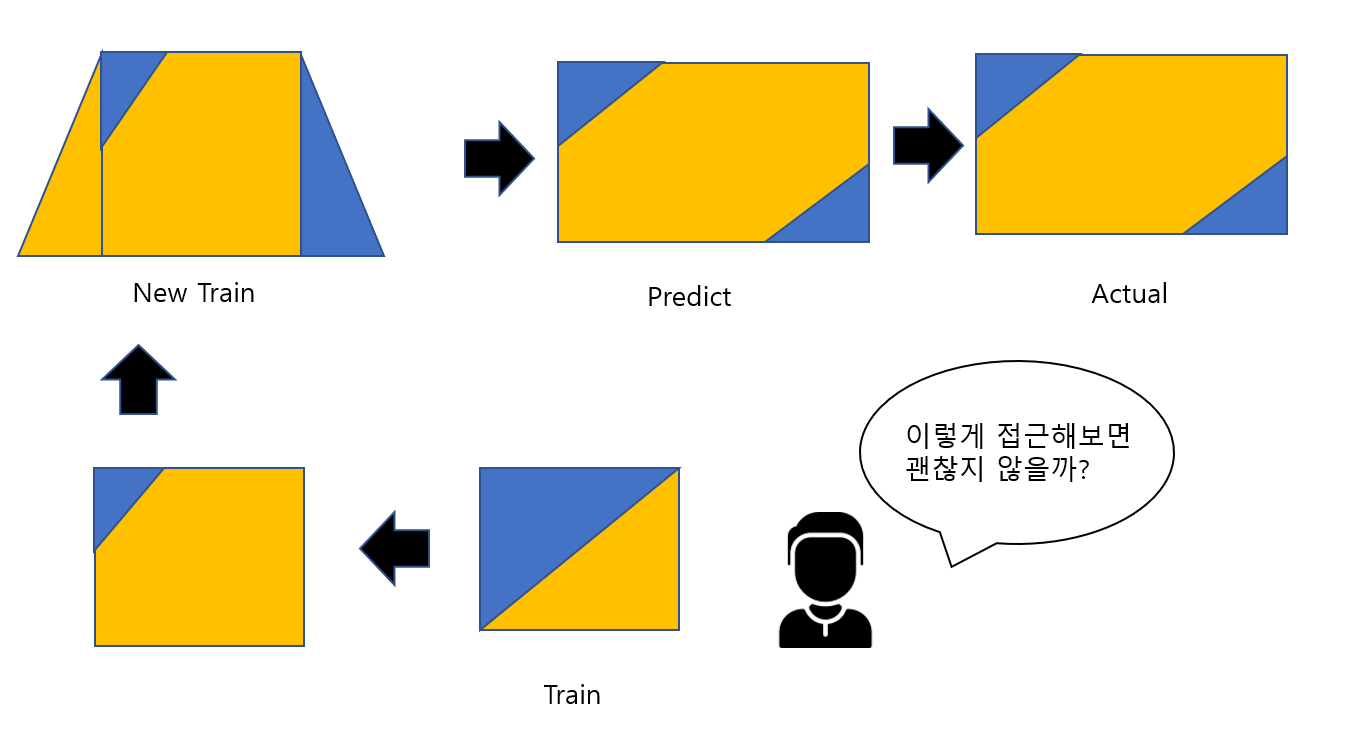

먼저, train 데이터에서 타겟이 0인 많은 데이터와 1이 많은 데이터를 만들어 준다.

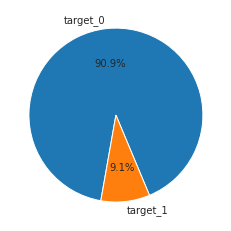

In [116]:
df_0=train.loc[train['target']==0]
df_1=train.loc[train['target']==1]
df_1_drop, df_11=train_test_split(df_1, test_size=0.1, random_state=42)
df_11=df_11.reset_index()
df_1=df_1.reset_index()
train_0=pd.concat([df_0, df_11], axis=0)
train_0=train_0.sort_values('index', ascending=True)
train_0.drop('index', axis=1, inplace=True)
zero=len(train_0.loc[train_0['target']==0].index)
one=len(train_0.loc[train_0['target']==1].index)
ratio=[zero, one]
labels=['target_0', 'target_1']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

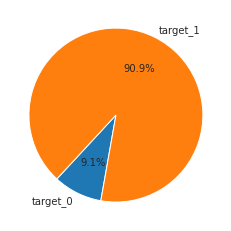

In [117]:
train_1=make_sample(train, 0.1)

In [118]:
train_0=train_0.reset_index()
train_1=train_1.reset_index()

이제 불균형해진 train_0과 train_1의 데이터에서 불균형한 데이터를 SMOTE를 사용하여 Oversampling 해준다.

In [120]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=0)

def make_over_sampling(df):
  x=df.drop('target', axis=1)
  y=df[['target']]
  x, y=sm.fit_resample(x, y)
  new_df=pd.concat([x,y], axis=1)
  return new_df

In [121]:
new_train_0=make_over_sampling(train_0)

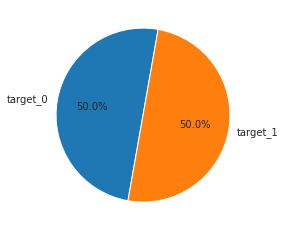

In [122]:
only_pie_chart(new_train_0)

새로 만들어진 데이터는 0과 유사한 특성을 갖는 데이터이지만, 의도적으로 타겟을 1로 바꾸어 주어 Noise 데이터를 만들어준다.

In [113]:
# 0일 경우, 1로 만들어주고, 1일 경우 0으로 만들어줍니다.
new_train_0['target']=new_train_0['target'].apply(lambda x:2 if 0 else 3)
new_train_0['target']=new_train_0['target'].apply(lambda x:1 if 2 else 0)
# 2가 된 데이터 들은 전부 0이였는데, 다시 돌아올땐 1로 돌아옵니다.
# 3이 된 데이터 들은 전부 1이였는데, 다시 돌아올때는 0으로 돌아옵니다.

In [123]:
new_train_0.drop('index', axis=1, inplace=True)

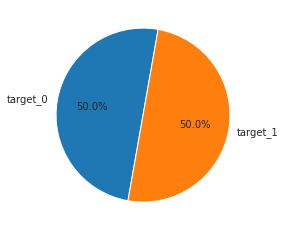

In [134]:
only_pie_chart(new_train_0)

In [153]:
new_train_1=make_over_sampling(train_1)

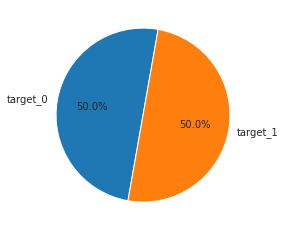

In [154]:
only_pie_chart(new_train_1)

또 다른 새로 만들어진 데이터는 1과 유사한 특성을 갖는 데이터이지만, 의도적으로 타겟을 0로 바꾸어 주어 Noise 데이터를 만들어준다.

In [156]:
new_train_1.iloc[:, 58]

0         1
1         1
2         1
3         0
4         1
         ..
501685    0
501686    0
501687    0
501688    0
501689    0
Name: target, Length: 501690, dtype: int64

In [158]:
for i in tqdm(range(len(new_train_1.index))):
  num=new_train_1.iloc[i, 58]
  if num==1:
    new_train_1.iloc[i, 58]=0
  else:
    new_train_1.iloc[i, 58]=1

100%|██████████| 501690/501690 [01:39<00:00, 5022.34it/s]


In [147]:
# 0일 경우, 1로 만들어주고, 1일 경우 0으로 만들어줍니다.
#new_train_1['target']=new_train_1['target'].apply(lambda x:2 if 0 else 3)
#new_train_1['target']=new_train_1['target'].apply(lambda x:1 if 2 else 0)
# 2가 된 데이터 들은 전부 0이였는데, 다시 돌아올땐 1로 돌아옵니다.
# 3이 된 데이터 들은 전부 1이였는데, 다시 돌아올때는 0으로 돌아옵니다.
# 에러 남.

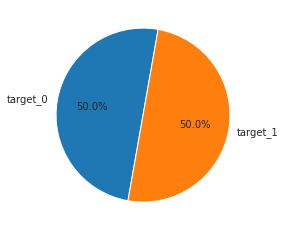

In [159]:
only_pie_chart(new_train_1)

In [173]:
new_train_0=new_train_0.reset_index()
new_train_1=new_train_1.reset_index()
new_train_0.drop('index', axis=1, inplace=True)
new_train_1.drop('index', axis=1, inplace=True)

In [176]:
new_train=pd.concat([new_train_1, new_train_0], axis=0)

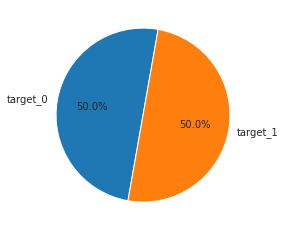

In [177]:
only_pie_chart(new_train)

In [178]:
new_train

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,date,hour,day,target
0,1,1,1,2,2,2,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,17,12,0,0
1,2,2,2,1,2,2,1,1,2,5,175,181,114,4,72,227,2,3,3,5,1,1,2,1608,275,1,4,74,836994,580234,175,152,56,1,175,152,56,1,114,109,56,1,275,274,274,216,71,379,226,495,1,315,71,381,29,20,1,0
2,1,2,2,1,2,2,1,2,2,1,372,299,147,5,126,139,96,3,1,10,2,1,2,1608,275,5,4,133,763441,348156,369,368,297,216,299,298,297,216,145,123,56,1,275,274,274,216,94,412,94,422,94,399,94,417,4,20,5,0
3,1,1,2,1,2,2,1,5,2,5,1029,1027,1003,6,119,135,4,3,1,10,2,1,2,527,1028,1,6,139,794362,376009,1027,1026,1000,926,1027,1026,1000,926,1003,1001,1000,926,1027,1026,1000,926,94,408,94,418,3,316,94,422,19,18,1,1
4,1,2,2,1,1,1,1,3,2,5,1039,1229,991,6,139,96,116,2,3,10,2,1,2,527,1230,1,6,139,584136,364871,1037,1036,1000,926,1227,1227,1227,926,989,988,927,926,1227,1227,1227,926,94,422,94,399,94,407,94,422,9,6,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502207,1,2,2,1,2,2,1,0,2,1,172,178,116,3,156,38,255,2,3,10,2,1,2,460,114,1,3,263,431119,232283,172,150,56,1,172,150,56,1,116,110,56,1,114,109,56,1,152,438,37,348,250,520,250,528,2,19,2,1
502208,1,2,2,2,2,2,1,5,2,5,718,834,932,6,3,80,64,2,1,5,1,3,2,339,849,1,5,118,114761,110685,718,712,701,625,834,831,824,744,927,926,893,778,845,844,824,744,2,315,79,384,63,372,83,406,6,11,3,1
502209,1,2,2,1,1,2,1,1,3,5,103,96,111,4,210,211,210,2,2,4,1,1,1,1654,118,1,4,211,869367,606037,102,94,56,1,93,91,56,1,109,102,56,1,114,109,56,1,208,481,208,480,208,481,208,481,24,15,0,1
502210,1,2,2,1,2,2,1,2,3,4,568,745,572,4,14,39,27,1,2,5,1,2,2,1540,566,4,3,96,36722,27703,567,566,550,482,745,742,728,672,570,568,550,482,565,558,550,482,3,326,23,345,15,338,73,388,7,11,1,1


In [191]:
#new_train.to_csv("new_train.csv", index=False)

# Experiment 02 실험 하기

In [16]:
new_train=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/new_train.csv")

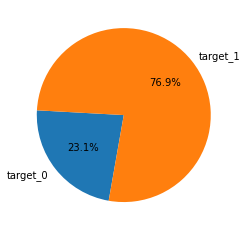

In [17]:
tn_8=make_sample(train, 0.3)

In [18]:
print(len(tn_8.index))

326177


In [19]:
noise_, noise=train_test_split(new_train, test_size=0.03, random_state=42)
# 새로 만든 데이터가 100만개의 데이터이므로 이중에 1%만 추출해줍니다.
noise=noise.reset_index()
noise.drop('index', axis=1, inplace=True)
tn_8=pd.concat([tn_8, noise], axis=0)
tn_8=tn_8.reset_index()
tn_8.drop('index', axis=1, inplace=True)

In [20]:
tn_8_A, tn_8_val=train_test_split(tn_8, test_size=0.3, random_state=42)
tn_8_tn, tn_8_te=train_test_split(tn_8_A, test_size=0.3, random_state=999)
x_train=tn_8_tn.drop('target', axis=1)
y_train=tn_8_tn['target']
x_test=tn_8_te.drop('target', axis=1)
y_test=tn_8_te['target']

x=tn_8_A.drop('target', axis=1)
y=tn_8_A['target']
x_val=tn_8_val.drop('target', axis=1)
y_val=tn_8_val['target']

recall 1차 : 0.9543423874195854
precision 1차:  0.7624166630976345
f1_1차 :  0.8476513209583595
              precision    recall  f1-score   support

           0       0.46      0.12      0.19     18862
           1       0.76      0.95      0.85     55960

    accuracy                           0.74     74822
   macro avg       0.61      0.54      0.52     74822
weighted avg       0.69      0.74      0.68     74822



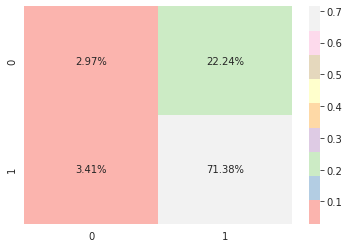

recall 2차 : 0.9484405555834128
precision 2차:  0.7623610733250707
f1_2차 :  0.8452811216937128
              precision    recall  f1-score   support

           0       0.46      0.13      0.20     27117
           1       0.76      0.95      0.85     79772

    accuracy                           0.74    106889
   macro avg       0.61      0.54      0.52    106889
weighted avg       0.69      0.74      0.68    106889



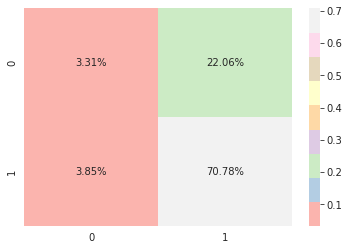

f1 avg score : 0.8464662213260361


In [193]:
result(extra, x_train,y_train, x_test, y_test, x,y,x_val,y_val)

In [194]:
x_train=tn_8_A.drop('target', axis=1)
y_train=tn_8_A['target']
x_test=test.copy()

In [195]:
extra=ExtraTreesClassifier(random_state=42)
extra.fit(x_train, y_train)
y_pred=extra.predict(x_test)
df_pred=pd.DataFrame(y_pred, columns=['target'])

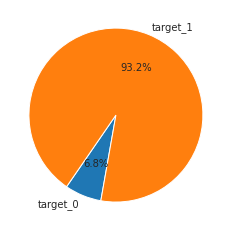

In [196]:
only_pie_chart(df_pred)

In [197]:
df_pred['target'].value_counts()

1    43238
0     3166
Name: target, dtype: int64

In [198]:
sub=sub_1.drop('target',axis=1)
sub_extra=pd.concat([sub, df_pred['target']], axis=1)
#sub_extra.to_csv("sub_extra_3.csv", index=False)

# Experiment 03

### Experiment Report

###Default


**Default 70대 30 Test**

마지막에 tn_8이 아닌 tn_8_A를 학습시킨 것이 포인트

1차 검증

|f1|recall|precision|
|---|---|---|
|0.8679|0.97804|0.7801|


2차 검증

|f1|recall|precision|
|---|---|---|
|0.8675|0.9748|0.7814|

f1 avg score : 0.8677407077801731

> **실제 score: 0.6777000359**


###Experiment 01


**80대 20 Test**

전부, 80대 20 비율로 조정

1차 검증

|f1|recall|precision|
|---|---|---|
|0.9084|0.9924|0.8375|

2차 검증

|f1|recall|precision|
|---|---|---|
|0.9079|0.9910|0.8376|

f1 avg score : 0.9081782669898504

실제 score: 0.6745427496	

###Experiment 02


**70대 30 noise Test**

전부, 80대 20 비율로 조정

1차 검증

|f1|recall|precision|
|---|---|---|
|0.8476|0.9543|0.7624|

2차 검증

|f1|recall|precision|
|---|---|---|
|0.8452|0.9484|0.7623|

f1 avg score : 0.8464662213260361

- score: 	0.6782138024

지난 2가지 실험을 통해 Noise가 들어간 상태에서 학습할 경우, 결과가 아주 조금 더 상승하는 것을 볼 수 있었습니다. 그러나, 학습에서의 결과는 가장 좋지 않았습니다.

이번에는 ExtraTreeClassifier 이 외에도 노이즈가 들어간 데이터에서 학습을 높이는 방법에 대한 실험을 진행하도록 하겠습니다.

판별분석으로 접근
--

판별분석과 회귀분석의 경우, 사전에 진행된 EDA 과정을 통해, 변수들을 선택한 후, 정규화 하여 진행하였습니다.

###Quadratic Discriminant Analysis

In [22]:
qd=QuadraticDiscriminantAnalysis()
ld=LinearDiscriminantAnalysis()

In [23]:
# EDA 과정에서 p-value 0.05이상 제거, 

tn_8_A, tn_8_val=train_test_split(tn_8, test_size=0.3, random_state=42)
tn_8_tn, tn_8_te=train_test_split(tn_8_A, test_size=0.3, random_state=999)
x_train=tn_8_tn.drop(['target','contents_attribute_a',
 'contents_attribute_c',
 'contents_attribute_h_l',
 'contents_attribute_l',
 'date',
 'day',
 'h_l_match_yn',
 'h_s_match_yn',
 'hour',
 'person_attribute_a',
 'person_prefer_c',
 'person_prefer_d_3_l',
 'person_prefer_h_1',
 'person_prefer_h_2',
 'person_prefer_h_2_l',
 'person_prefer_h_2_m',
 'person_prefer_h_3',
 'person_prefer_h_3_l',
 'person_prefer_h_3_m'], axis=1)
y_train=tn_8_tn['target']
x_test=tn_8_te.drop(['target','contents_attribute_a',
 'contents_attribute_c',
 'contents_attribute_h_l',
 'contents_attribute_l',
 'date',
 'day',
 'h_l_match_yn',
 'h_s_match_yn',
 'hour',
 'person_attribute_a',
 'person_prefer_c',
 'person_prefer_d_3_l',
 'person_prefer_h_1',
 'person_prefer_h_2',
 'person_prefer_h_2_l',
 'person_prefer_h_2_m',
 'person_prefer_h_3',
 'person_prefer_h_3_l',
 'person_prefer_h_3_m'], axis=1)
y_test=tn_8_te['target']

x=tn_8_A.drop(['target','contents_attribute_a',
 'contents_attribute_c',
 'contents_attribute_h_l',
 'contents_attribute_l',
 'date',
 'day',
 'h_l_match_yn',
 'h_s_match_yn',
 'hour',
 'person_attribute_a',
 'person_prefer_c',
 'person_prefer_d_3_l',
 'person_prefer_h_1',
 'person_prefer_h_2',
 'person_prefer_h_2_l',
 'person_prefer_h_2_m',
 'person_prefer_h_3',
 'person_prefer_h_3_l',
 'person_prefer_h_3_m'], axis=1)
y=tn_8_A['target']
x_val=tn_8_val.drop(['target','contents_attribute_a',
 'contents_attribute_c',
 'contents_attribute_h_l',
 'contents_attribute_l',
 'date',
 'day',
 'h_l_match_yn',
 'h_s_match_yn',
 'hour',
 'person_attribute_a',
 'person_prefer_c',
 'person_prefer_d_3_l',
 'person_prefer_h_1',
 'person_prefer_h_2',
 'person_prefer_h_2_l',
 'person_prefer_h_2_m',
 'person_prefer_h_3',
 'person_prefer_h_3_l',
 'person_prefer_h_3_m'], axis=1)
y_val=tn_8_val['target']

In [24]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
s_x_train=ss.fit_transform(x_train)
s_x_test=ss.fit_transform(x_test)
s_x=ss.fit_transform(x)
s_x_val=ss.fit_transform(x_val)

df_x_train=pd.DataFrame(s_x_train , index=x_train.index , columns=x_train.columns )
df_x_test=pd.DataFrame(s_x_test , index=x_test.index , columns=x_test.columns )
df_x=pd.DataFrame(s_x , index=x.index , columns=x.columns )
df_x_val=pd.DataFrame(s_x_val , index=x_val.index , columns=x_val.columns )

recall 1차 : 0.9492673338098642
precision 1차:  0.7621705381867225
f1_1차 :  0.8454920935562683
              precision    recall  f1-score   support

           0       0.45      0.12      0.19     18862
           1       0.76      0.95      0.85     55960

    accuracy                           0.74     74822
   macro avg       0.60      0.54      0.52     74822
weighted avg       0.68      0.74      0.68     74822



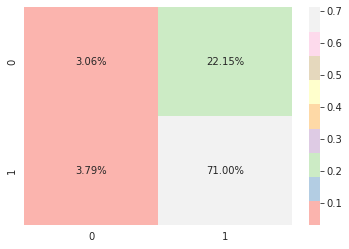

recall 2차 : 0.9311036453893596
precision 2차:  0.765037903757416
f1_2차 :  0.8399411964265522
              precision    recall  f1-score   support

           0       0.44      0.16      0.23     27117
           1       0.77      0.93      0.84     79772

    accuracy                           0.74    106889
   macro avg       0.60      0.54      0.54    106889
weighted avg       0.68      0.74      0.69    106889



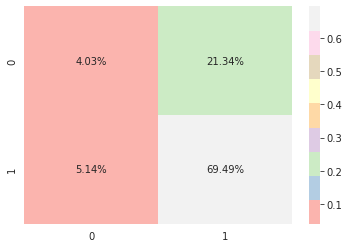

f1 avg score : 0.8427166449914103


In [205]:
result(extra, df_x_train,y_train, df_x_test, y_test, df_x,y,df_x_val,y_val)

###Gaussian Discriminant Analysis Applications


In [210]:
class GaussianDiscriminantAnalysis:
    def __init__(self):
        pass

    def initialize_data(self, X_, y_):
        self.n_features_ = X_.shape[1]

        self.classes_ = np.unique(y_)
        self.classes_.sort()

        self.means_ = np.zeros((self.classes_.size, self.n_features_))
        self.priors_ = np.zeros(self.classes_.size)

    def fit(self, X, y):
        pass

    def predict(self, X):
        pass

    def proba_score(self, X, mean, prior):
        pass

    def get_values(self, data):
        if (isinstance(data, pd.DataFrame) or isinstance(data, pd.Series)):
            return data.values
        return data

class QuadraticDiscriminantAnalysis(GaussianDiscriminantAnalysis):
    def fit(self, X, y):
        X_ = self.get_values(X)
        y_ = self.get_values(y)

        self.initialize_data(X_, y_)

        self.cov_matrices_ = np.zeros(
            (self.classes_.size, self.n_features_, self.n_features_))
        for index, y_class in enumerate(self.classes_):
            has_y_class = (y_ == y_class)
            self.means_[index] = np.mean(X_[has_y_class], axis=0)
            self.priors_[index] = y_[has_y_class].size / y_.size
            self.cov_matrices_[index] = self.calc_class_covariance(
                X_[has_y_class], self.means_[index])

    def predict(self, X):
        X_ = self.get_values(X)
        probs = np.zeros((X_.shape[0], self.priors_.size))
        for index, _ in enumerate(self.classes_):
            probs[:, index] = self.proba_score(X_, self.means_[index], self.priors_[
                                               index], self.cov_matrices_[index])
        probs_arg_max = np.argmax(probs, axis=1)
        return probs_arg_max

    def proba_score(self, X, mean, prior, cov_matrix):
        cov_matrix_det = np.linalg.det(cov_matrix)
        cov_matrix_inv = np.linalg.pinv(cov_matrix)

        Xm = X - mean
        Xm_cov = (Xm @ cov_matrix_inv) * Xm
        Xm_cov_sum = Xm_cov.sum(axis=1)
        return -0.5*Xm_cov_sum - 0.5*np.log(cov_matrix_det) + np.log(prior)

    def calc_class_covariance(self, X_members_i, mean_i):
        if (X_members_i.shape[0] == 0):
            return np.zeros((X_members_i.shape[1], X_members_i.shape[1]))
        return (X_members_i - mean_i).T @ (X_members_i - mean_i) / X_members_i.shape[0]

- .py 출처: https://github.com/tugrulhkarabulut/Gaussian-Discriminant-Analysis/blob/master/GaussianDiscriminantAnalysis.py


In [212]:
gqda=QuadraticDiscriminantAnalysis()

recall 1차 : 0.8253216583273767
precision 1차:  0.777485985556285
f1_1차 :  0.8006899959259034
              precision    recall  f1-score   support

           0       0.37      0.30      0.33     18862
           1       0.78      0.83      0.80     55960

    accuracy                           0.69     74822
   macro avg       0.57      0.56      0.56     74822
weighted avg       0.67      0.69      0.68     74822



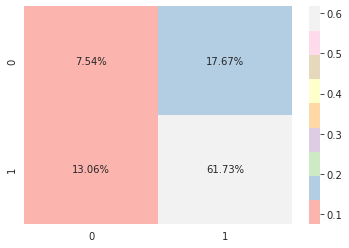

recall 2차 : 0.8265431479717193
precision 2차:  0.7759340982641953
f1_2차 :  0.8004394617200921
              precision    recall  f1-score   support

           0       0.37      0.30      0.33     27117
           1       0.78      0.83      0.80     79772

    accuracy                           0.69    106889
   macro avg       0.57      0.56      0.56    106889
weighted avg       0.67      0.69      0.68    106889



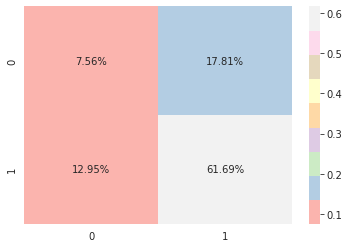

f1 avg score : 0.8005647288229978


In [213]:
result(gqda, df_x_train,y_train, df_x_test, y_test, df_x,y,df_x_val,y_val)

로지스틱 회귀 계열로 접근
--

### Logistic Regression CV

In [215]:
from sklearn.linear_model import LogisticRegressionCV

logiCV=LogisticRegressionCV()

recall 1차 : 0.9957648320228735
precision 1차:  0.7495191337682426
f1_1차 :  0.8552703273090058
              precision    recall  f1-score   support

           0       0.50      0.01      0.02     18862
           1       0.75      1.00      0.86     55960

    accuracy                           0.75     74822
   macro avg       0.63      0.50      0.44     74822
weighted avg       0.69      0.75      0.65     74822



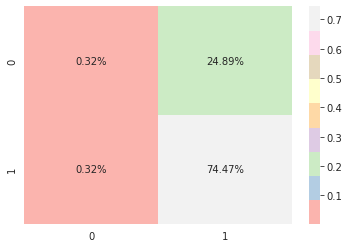

recall 2차 : 0.995625031339317
precision 2차:  0.7479470373300184
f1_2차 :  0.854194450419445
              precision    recall  f1-score   support

           0       0.50      0.01      0.03     27117
           1       0.75      1.00      0.85     79772

    accuracy                           0.75    106889
   macro avg       0.63      0.50      0.44    106889
weighted avg       0.69      0.75      0.64    106889



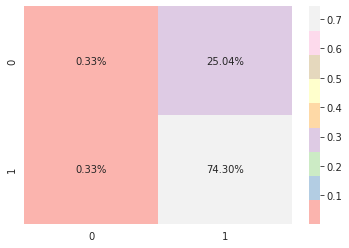

f1 avg score : 0.8547323888642253


In [222]:
result(logiCV, df_x_train,y_train, df_x_test, y_test, df_x,y,df_x_val,y_val)

### Generalized Addive Models

일반화 가법 모델(GAMs)은 가산성은 유지하면서, 각 변수의 비선형함수들을 허용하여 표준선형모델을 확장하는 일반적 체계를 제공한다.

In [ ]:
!pip install pygam

In [29]:
from pygam import LogisticGAM, s, f

gam=LogisticGAM()

recall 1차 : 0.982987848463188
precision 1차:  0.7578007687115128
f1_1차 :  0.8558292946658472
              precision    recall  f1-score   support

           0       0.57      0.07      0.12     18862
           1       0.76      0.98      0.86     55960

    accuracy                           0.75     74822
   macro avg       0.67      0.53      0.49     74822
weighted avg       0.71      0.75      0.67     74822



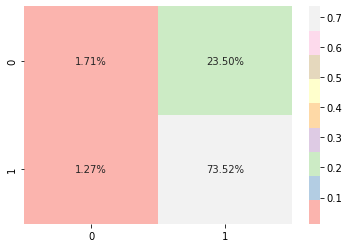

In [ ]:
result(gam, df_x_train,y_train, df_x_test, y_test, df_x,y,df_x_val,y_val)

- session 다운 됨

Support Vector Machine
--

In [161]:
from sklearn.svm import SVC 
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [162]:
x_train=tn_8_tn.drop(['target','contents_attribute_a',
 'contents_attribute_c',
 'contents_attribute_h_l',
 'contents_attribute_l',
 'date',
 'day',
 'h_l_match_yn',
 'h_s_match_yn',
 'hour',
 'person_attribute_a',
 'person_prefer_c',
 'person_prefer_d_3_l',
 'person_prefer_h_1',
 'person_prefer_h_2',
 'person_prefer_h_2_l',
 'person_prefer_h_2_m',
 'person_prefer_h_3',
 'person_prefer_h_3_l',
 'person_prefer_h_3_m'], axis=1)
y_train=tn_8_tn['target']
x_test=tn_8_te.drop(['target','contents_attribute_a',
 'contents_attribute_c',
 'contents_attribute_h_l',
 'contents_attribute_l',
 'date',
 'day',
 'h_l_match_yn',
 'h_s_match_yn',
 'hour',
 'person_attribute_a',
 'person_prefer_c',
 'person_prefer_d_3_l',
 'person_prefer_h_1',
 'person_prefer_h_2',
 'person_prefer_h_2_l',
 'person_prefer_h_2_m',
 'person_prefer_h_3',
 'person_prefer_h_3_l',
 'person_prefer_h_3_m'], axis=1)
y_test=tn_8_te['target']

x=tn_8_A.drop(['target','contents_attribute_a',
 'contents_attribute_c',
 'contents_attribute_h_l',
 'contents_attribute_l',
 'date',
 'day',
 'h_l_match_yn',
 'h_s_match_yn',
 'hour',
 'person_attribute_a',
 'person_prefer_c',
 'person_prefer_d_3_l',
 'person_prefer_h_1',
 'person_prefer_h_2',
 'person_prefer_h_2_l',
 'person_prefer_h_2_m',
 'person_prefer_h_3',
 'person_prefer_h_3_l',
 'person_prefer_h_3_m'], axis=1)
y=tn_8_A['target']
x_val=tn_8_val.drop(['target','contents_attribute_a',
 'contents_attribute_c',
 'contents_attribute_h_l',
 'contents_attribute_l',
 'date',
 'day',
 'h_l_match_yn',
 'h_s_match_yn',
 'hour',
 'person_attribute_a',
 'person_prefer_c',
 'person_prefer_d_3_l',
 'person_prefer_h_1',
 'person_prefer_h_2',
 'person_prefer_h_2_l',
 'person_prefer_h_2_m',
 'person_prefer_h_3',
 'person_prefer_h_3_l',
 'person_prefer_h_3_m'], axis=1)
y_val=tn_8_val['target']

In [163]:
svm_clf = Pipeline([
    ('scaler', MinMaxScaler()),
    ('rbf', SVC(kernel='rbf', gamma='auto'))
])

- 지금 같은 상황에서는 Linear하게 접근하면 안 된다. 그러나 다른 커널의 경우 시간이 너무 오래걸리기 때문에, Linear로 먼저 접근하고 넘어가도록 하자.

> 이 외에 커널

- 다항식(poly)
- 가우시안 RBF(rbf)
- 시그모이드

```
예시)

svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
```



In [ ]:
result(svm_clf, x_train,y_train, x_test, y_test, x,y,x_val,y_val)

- 참고자료: https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-7-%EC%BB%A4%EB%84%90-%EC%84%9C%ED%8F%AC%ED%8A%B8-%EB%B2%A1%ED%84%B0-%EB%A8%B8%EC%8B%A0/

SOM(Self Organizing Map)
--

- 다음에 더 참고해보자

https://github.com/JustGlowing/minisom/blob/master/examples/Classification.ipynb

In [144]:
from minisom import MiniSom    

In [153]:
def classify(som, data):
    winmap = som.labels_map(np.array(x), y)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [ ]:
#som = MiniSom(7, 7, 57, sigma=3, learning_rate=0.5, 
#              neighborhood_function='triangle', random_seed=10)
#som.pca_weights_init(np.array(x))
#som.train_random(np.array(x), 500, verbose=False)
#print(classification_report(y_val, classify(som, x_val)))

# Experiment 04

- Active Learning

- Change Thresold

- Calibration classification

https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_multiclass.html?highlight=classif

- TPOT